In [1]:
import pandas as pd
import numpy as np
from common import collect_results, normalize_region_name
from pathlib import Path
from matplotlib import pyplot as plt
import os

In [2]:
def get_matcher(prefix):
    def matcher(p: Path):   
        import re
        pattern = re.compile(prefix + r"-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(1))
        return {
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(2)),
            "mr": int(match.group(3)),
            "suffix": str(match.group(4)),
        }
    
    return matcher

In [3]:
OUTPUT_DIR = Path("./output/")
ROOT = Path("./ycsb")
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte", "cockroach"]
HOTS = [100000, 1000]
RENEW_CACHE = False

sunstorm_matcher = get_matcher("ycsb-throughput-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "throughput-sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"


aurora_matcher = get_matcher("ycsb-throughput-aurora")
aurora_throughput_df = collect_results(
    ROOT / "throughput-aurora",
    aurora_matcher,
    RENEW_CACHE,
)
# aurora_throughput_df["system"] = "aurora"
aurora_throughput_df["system"] = "aurora-global"

aurora_matcher = get_matcher("ycsb-throughput-aurora-eventual")
aurora_eventual_throughput_df = collect_results(
    ROOT / "throughput-aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_eventual_throughput_df["system"] = "aurora-eventual"


yugabyte_matcher = get_matcher("ycsb-throughput-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "throughput-yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"

cockroach_matcher = get_matcher("ycsb-throughput-cockroach")
cockroach_throughput_df = collect_results(
    ROOT / "throughput-cockroach",
    cockroach_matcher,
    RENEW_CACHE,
)
cockroach_throughput_df["system"] = "cockroach"

In [4]:
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte", "cockroach"]
ROOT = Path("./mixed")
HOTS = [100000, 1000]
RENEW_CACHE = False

sunstorm_matcher = get_matcher("ycsb-mixed-sunstorm")
mixed_sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)

mixed_sunstorm_throughput_df["system"] = "sunstorm"

aurora_matcher = get_matcher("ycsb-mixed-aurora")
mixed_aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
mixed_aurora_throughput_df["system"] = "aurora-global"


aurora_matcher = get_matcher("ycsb-mixed-aurora")
mixed_aurora_eventual_throughput_df = collect_results(
    ROOT / "aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
mixed_aurora_eventual_throughput_df["system"] = "aurora-eventual"

yugabyte_matcher = get_matcher("ycsb-mixed-yugabyte")
mixed_yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
mixed_yugabyte_throughput_df["system"] = "yugabyte"


cockroach_matcher = get_matcher("ycsb-mixed-cockroach")
mixed_cockroach_throughput_df = collect_results(
    ROOT / "cockroach",
    cockroach_matcher,
    RENEW_CACHE,
)
mixed_cockroach_throughput_df["system"] = "cockroach"

Found result: ycsb-mixed-sunstorm-hot100000-F-mr50-20250115-140914
Time (seconds)                            42.5000
Throughput (requests/second)             848.4000
Average Latency (millisecond)            120.5405
Minimum Latency (millisecond)             79.0975
25th Percentile Latency (millisecond)     82.2700
Median Latency (millisecond)             146.2260
75th Percentile Latency (millisecond)    157.4065
90th Percentile Latency (millisecond)    159.1270
95th Percentile Latency (millisecond)    160.1030
99th Percentile Latency (millisecond)    169.0205
Maximum Latency (millisecond)            311.7885
tp (req/s) scaled                          0.0080
dtype: float64
Time (seconds)                            42.5000
Throughput (requests/second)             141.8000
Average Latency (millisecond)            159.9525
Minimum Latency (millisecond)            152.0285
25th Percentile Latency (millisecond)    157.4490
Median Latency (millisecond)             159.1100
75th Percentile La

In [5]:
ycsb_throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    aurora_eventual_throughput_df,
    yugabyte_throughput_df,
    cockroach_throughput_df,
])
ycsb_throughput_df["HOT"] = ycsb_throughput_df["hot"]
ycsb_throughput_df["workload"] = "RMW"
normalize_region_name(ycsb_throughput_df)
ycsb_throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,rejected.WorkloadF3,...,p100.WorkloadF1,throughput,unexpected.WorkloadF2,unexpected.WorkloadF3,system,throughput.WorkloadF1,throughput.WorkloadF2,throughput.WorkloadF3,unexpected.WorkloadF1,HOT
0,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,1000,RMW,50,20240430-163636,40903,2230,29215.0,9458.0,...,388.599,963.188020,NaN,NaN,sunstorm,NaN,NaN,NaN,NaN,1000
1,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,3-ap-northeast-1-0,1000,RMW,50,20240430-163636,32562,1973,23506.0,7083.0,...,453.628,603.742952,NaN,NaN,sunstorm,NaN,NaN,NaN,NaN,1000
2,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,2-eu-west-1-0,1000,RMW,50,20240430-163636,35186,2175,24721.0,8290.0,...,393.213,790.151340,NaN,NaN,sunstorm,NaN,NaN,NaN,NaN,1000
3,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,10000,RMW,50,20240430-161215,3402,502,2246.0,654.0,...,247.081,1726.062443,NaN,NaN,sunstorm,NaN,NaN,NaN,NaN,10000
4,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,3-ap-northeast-1-0,10000,RMW,50,20240430-161215,3258,485,2143.0,630.0,...,283.674,1172.259113,NaN,NaN,sunstorm,NaN,NaN,NaN,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,ycsb/throughput-cockroach/ycsb-throughput-cock...,3-ap-northeast-1-0,100000,RMW,0,20241126-225357,318,318,NaN,NaN,...,705.764,2924.094151,NaN,NaN,cockroach,2896.2,NaN,NaN,NaN,100000
26,ycsb/throughput-cockroach/ycsb-throughput-cock...,2-eu-west-1-0,100000,RMW,0,20241126-225357,314,314,NaN,NaN,...,661.618,2647.337690,NaN,NaN,cockroach,2646.4,NaN,NaN,NaN,100000
27,ycsb/throughput-cockroach/ycsb-throughput-cock...,1-us-east-1-0,1000,RMW,0,20241126-225357,5460,5460,NaN,NaN,...,700.446,2844.069269,NaN,NaN,cockroach,2898.5,NaN,NaN,NaN,1000
28,ycsb/throughput-cockroach/ycsb-throughput-cock...,3-ap-northeast-1-0,1000,RMW,0,20241126-225357,5648,5648,NaN,NaN,...,629.192,2888.995681,NaN,NaN,cockroach,2948.0,NaN,NaN,NaN,1000


In [6]:
mixed_throughput_df = pd.concat([
    mixed_sunstorm_throughput_df,
    mixed_aurora_throughput_df,
    mixed_aurora_eventual_throughput_df,
    mixed_yugabyte_throughput_df,
    mixed_cockroach_throughput_df,
])
mixed_throughput_df["HOT"] = mixed_throughput_df["hot"]
mixed_throughput_df["workload"] = "Read-Heavy"
normalize_region_name(mixed_throughput_df)
mixed_throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadB1,rejected.WorkloadB2,rejected.WorkloadB3,...,p99.WorkloadB2,p100.WorkloadB2,throughput.WorkloadB2,throughput.WorkloadB3,throughput.WorkloadB1,system,unexpected.WorkloadB1,unexpected.WorkloadB2,unexpected.WorkloadB3,HOT
0,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,Read-Heavy,50,20250115-140914,181,55.0,103.0,23.0,...,168.76575,319.967,848.4,141.8,993.1,sunstorm,NaN,NaN,NaN,100000
1,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,Read-Heavy,50,20250115-140914,148,50.0,82.0,16.0,...,217.20540,461.254,576.6,96.1,666.3,sunstorm,NaN,NaN,NaN,100000
2,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,2-eu-west-1-0,100000,Read-Heavy,50,20250115-140914,153,41.0,94.0,18.0,...,216.94245,428.922,686.7,114.5,798.0,sunstorm,NaN,NaN,NaN,100000
3,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,Read-Heavy,5,20250115-140914,711,512.0,165.0,34.0,...,229.87035,2955.460,545.5,89.9,12096.5,sunstorm,NaN,NaN,NaN,100000
4,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,Read-Heavy,5,20250115-140914,854,612.0,206.0,36.0,...,280.95800,1565.388,453.7,74.9,10087.2,sunstorm,NaN,NaN,NaN,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,mixed/cockroach/ycsb-mixed-cockroach-hot1000-F...,3-ap-northeast-1-0,1000,Read-Heavy,0,20241126-232430,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7672.4,cockroach,NaN,NaN,NaN,1000
26,mixed/cockroach/ycsb-mixed-cockroach-hot1000-F...,2-eu-west-1-0,1000,Read-Heavy,0,20241126-232430,3,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7216.8,cockroach,NaN,NaN,NaN,1000
27,mixed/cockroach/ycsb-mixed-cockroach-hot1000-F...,1-us-east-1-0,1000,Read-Heavy,10,20241126-232430,335,11.0,92.0,232.0,...,1500.09722,3159.858,531.0,87.3,5544.2,cockroach,NaN,NaN,NaN,1000
28,mixed/cockroach/ycsb-mixed-cockroach-hot1000-F...,3-ap-northeast-1-0,1000,Read-Heavy,10,20241126-232430,383,11.0,109.0,263.0,...,1821.81905,3585.348,362.0,61.0,3831.1,cockroach,NaN,NaN,NaN,1000


In [7]:
throughput_df = pd.concat([ycsb_throughput_df, mixed_throughput_df])

In [8]:
error_columns = ['ood_index_page', 'ood_tuple', 'other_aborts'] 
error_df = throughput_df.groupby(["workload","hot", "system", "mr"]).sum()[error_columns + ['ood_table', 'deadlock', 'completed']]
error_df["error_total"] = error_df['ood_index_page'] + error_df['ood_tuple'] + error_df['other_aborts'] + error_df['ood_table'] + error_df['deadlock']
error_df["outdated index page"] = error_df["ood_index_page"] / error_df["completed"] * 100
error_df["outdated table"] = error_df["ood_table"] / error_df["completed"] * 100
error_df["outdated tuple"] = error_df["ood_tuple"] / error_df["completed"] * 100
error_df["other aborts"] = error_df["other_aborts"] / error_df["completed"] * 100
error_df["deadlock"] = error_df["deadlock"] / error_df["completed"] * 100
error_df["pct"] = error_df["deadlock"] + error_df["outdated index page"] + error_df["outdated table"] + error_df["outdated tuple"] + error_df["other aborts"]




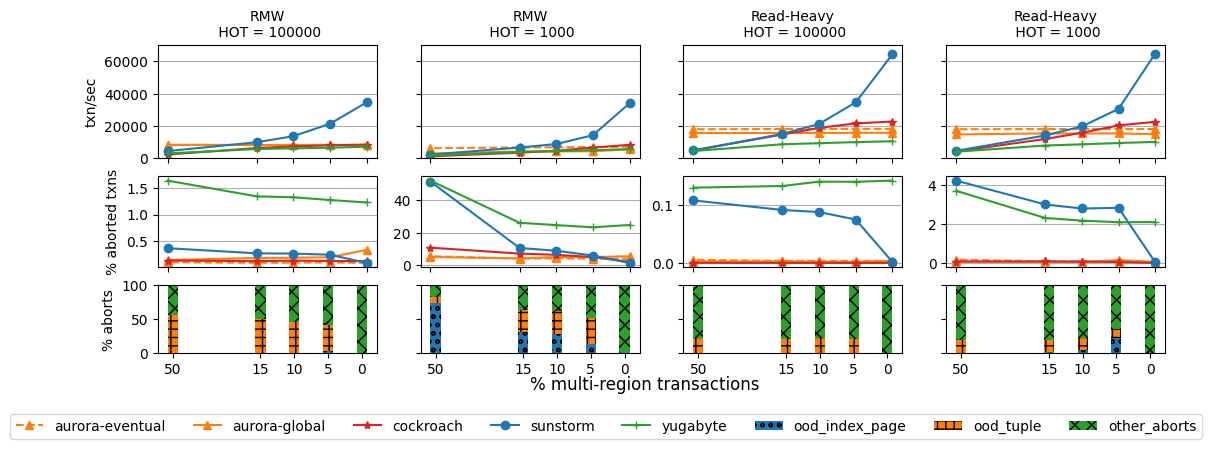

In [16]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

plt.rc('axes', labelsize=10) 
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

xticks = [0, 5, 10, 15, 50]
xticklabels = [0, 5, 10, 15, 50]
legend_handles = []
legend_labels = []
abort_colors = ["C0", "C1", "C2"]
abort_patterns = ["oo", "++", "xx"]
error_columns = ['ood_index_page', 'ood_tuple', 'other_aborts']

workloads = ["RMW", "Read-Heavy"]



fig = plt.figure(figsize=(13, 4))
gs = GridSpec(3, 4, figure=fig, height_ratios=[2.5, 2, 1.5], width_ratios=[1, 1, 1, 1])

for w, workload in enumerate(workloads):
    for h,hot in enumerate([100000, 1000]):
        ax = plt.subplot(gs[0, (w*2 + h)])
        hot_throughput_df = throughput_df[(throughput_df.hot == hot) & (throughput_df.workload == workload)]
        hot_throughput_df.pivot_table(
            index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
        ).plot(
            ax=ax,
            ylabel="txn/sec",
            style=["^--", "^-", "*-", "o-", "+-"],
            color=["C1", "C1", "C3", "C0", "C2"],
            ylim=(0, 70000),
            rot=0,
            legend=False,
        )
        ax.set_title(f"{workload}\n HOT = {hot}",fontsize=10)
        ax.set_xscale("symlog", linthresh=20)
        ax.set_xticks(xticks)
        ax.set_xticklabels([])
        ax.margins(x=0.05)
        ax.grid(axis="y")
        ax.invert_xaxis()
        ax.set_xlabel("")
        
        if w+h == 0:
            handles, labels = ax.get_legend_handles_labels()
            legend_handles += handles
            legend_labels += labels
        else:
            ax.set_yticklabels([])
            ax.set_ylabel("")
        

        ax = plt.subplot(gs[1, h+2*w])

        error_df.unstack(level=1)["pct"].loc[workload][hot].unstack(level=0)\
            .set_index(np.array(xticks))\
            .plot(
                ax=ax,
                ylabel="% aborted txns",
                style=["^--", "^-", "*-", "o-", "+-"],
                color=["C1", "C1", "C3", "C0", "C2"],
                rot=0,
                legend=False,
            )

        ax.set_xscale("symlog", linthresh=20)
        ax.set_xticks(xticks)
        ax.set_xticklabels([])
        ax.margins(x=0.05)
        ax.grid(axis="y")
        ax.invert_xaxis()
        ax.get_yaxis().set_major_formatter(ScalarFormatter())
        if w+h != 0:
            ax.set_ylabel("")

        xticks_hack = [0, 5, 10, 15, 28]
        ax = plt.subplot(gs[2, h+2*w])
        sunstorm_error_df = error_df.loc[(workload, hot, "sunstorm",)].copy()
        error_columns_pct = [f"{col}" for col in error_columns]
        bottom = None
        for col, color, pattern in zip(error_columns_pct, abort_colors, abort_patterns):
            error = sunstorm_error_df[col] / sunstorm_error_df["error_total"] * 100
            ax.bar(
                xticks_hack,
                error,
                bottom=bottom,
                label=col,
                width=1.5,
                facecolor=color,
                hatch=pattern,
            )
            if bottom is None:
                bottom = error
            else:
                bottom += error
        ax.set_ylim(0, 100)
        ax.margins(x=0.05)
        ax.set_xticks(xticks_hack)
        ax.set_xticklabels(xticklabels)
        ax.set_ylabel("% aborts")
        ax.invert_xaxis()
        if w+h == 0:
            handles, labels = ax.get_legend_handles_labels()
            legend_handles += handles
            legend_labels += labels
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])

fig.supxlabel("% multi-region transactions")
plt.legend(legend_handles, legend_labels, ncol=8,
           bbox_to_anchor=(1.2,-0.79)) 

plt.savefig("combined-throughput.pdf", bbox_inches="tight")
